# Introduction

 Done by : Ouagar Hajar (220240882)
This project aims to implement the analysis skills acquired during this module, following diffrent steps as defined in the followed section.
The choosen dataset of this project is the College, as it has a diffrent variables to discover and many things to learn.
As for the application, the analysis will be performed using Pyhton and diffrent libraries such as Pandas, numpy, matplotlib and scipy, statsmodels for regression part.
The implementation was fluent as the objectives were clear and easy to achieve.

In [97]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

Retriving the data, and defining the Institution as the index of my dataframe College

In [98]:
College = pd.read_excel(r"C:\Users\hajar\Desktop\ROOT\Business analytics\python\College.xlsx")
College.set_index("Institution")
College.head()

,Institution,Private,Apps,Accept,Enroll,Students,S.F.Ratio,Expend,Grad.Rate,PhD
0,Abilene Christian University,Yes,1660.0,1232.0,721.0,3422.0,18.1,7041.0,60.0,>50
1,Adelphi University,Yes,2186.0,1924.0,512.0,3910.0,12.2,10527.0,56.0,<50
2,Adrian College,Yes,1428.0,1097.0,336.0,1135.0,12.9,8735.0,54.0,>50
3,Agnes Scott College,Yes,417.0,349.0,137.0,573.0,7.7,19016.0,59.0,>50
4,Alaska Pacific University,Yes,193.0,146.0,55.0,1118.0,11.9,10922.0,15.0,>50


# Question 1

Generate descriptive statistics for the dataset.

describe() function is used to calculate statistical data such as and limited to mean, mode, median, standard deviation quartiles.

In [99]:
College.describe()

,Apps,Accept,Enroll,Students,S.F.Ratio,Expend,Grad.Rate
count,775.000000,774.000000,772.000000,776.000000,774.000000,775.000000,774.000000
mean,3004.927742,2014.164083,781.781088,4550.208763,14.090698,9642.797419,65.449612
std,3874.120093,2447.981568,931.034168,5858.384381,3.965024,5210.996785,17.194855
min,81.000000,72.000000,35.000000,3.000000,2.500000,3186.000000,10.000000
25%,778.000000,601.750000,242.750000,1225.500000,11.500000,6747.500000,53.000000
50%,1558.000000,1109.500000,435.500000,2095.000000,13.600000,8367.000000,65.000000
75%,3635.000000,2418.500000,902.250000,5121.000000,16.500000,10816.000000,78.000000
max,48094.000000,26330.000000,6392.000000,38338.000000,39.800000,56233.000000,118.000000


# Question 2

Check any records with missing values, and handle the missing data as appropriate.

The funtion sum() calcucates for each row and column as True=1 and False=0, hence it is used to calculate the missing values 

In [100]:
College.isnull().sum()

Institution     0
Private        12
Apps            2
Accept          3
Enroll          5
Students        1
S.F.Ratio       3
Expend          2
Grad.Rate       3
PhD             5
dtype: int64

Handle the missing data

In [101]:
College.dropna(inplace=True)
missing_data = College.isnull().sum().sum()
print("number of missing value is equal to : ", missing_data)

number of missing value is equal to :  0


In [102]:
College.head(3)

,Institution,Private,Apps,Accept,Enroll,Students,S.F.Ratio,Expend,Grad.Rate,PhD
0,Abilene Christian University,Yes,1660.0,1232.0,721.0,3422.0,18.1,7041.0,60.0,>50
1,Adelphi University,Yes,2186.0,1924.0,512.0,3910.0,12.2,10527.0,56.0,<50
2,Adrian College,Yes,1428.0,1097.0,336.0,1135.0,12.9,8735.0,54.0,>50


# Question 3

Build graphs visualizing the following and comment on the results

the distribution of one continuous variable using the histogram as appropriate plot for numeric data, 
and chosing Apps as the dependent variable for the correlation part

<AxesSubplot: title={'center': 'Distribution of student application'}, ylabel='Frequency'>

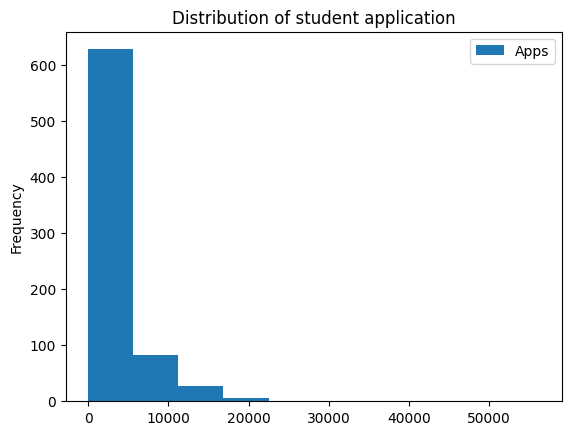

In [103]:
College.plot.hist(column="Apps", title="Distribution of student application")

It can be seen that the majority of the data is located is the left, hence this histogram is right skewed, which means that mean greater than median

the relationship of a pair of continuous variables, using scatter plot ot visualise association between two numeric variables

<AxesSubplot: title={'center': 'Distribution of number of application by students'}, xlabel='Students', ylabel='Apps'>

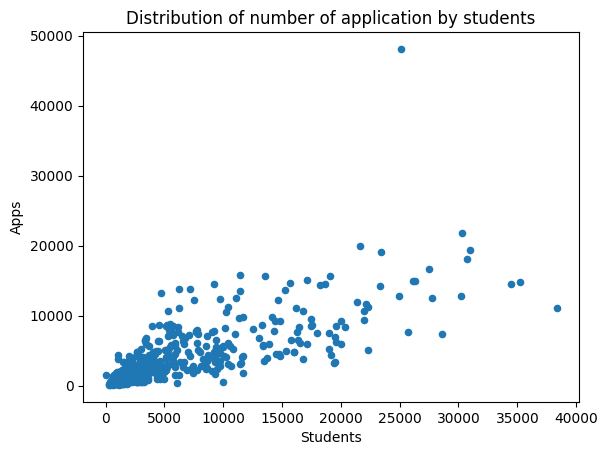

In [104]:
College.plot(kind="scatter", title="Distribution of number of application by students", x="Students", y="Apps")

The relationship between Students and Apps shows a positive linear relationship.

the relationship between a categorical variable and a continuous one using boxplot as appropriate to show the relationship,between categorical and continous variable

<AxesSubplot: title={'center': 'Students'}, xlabel='Private'>

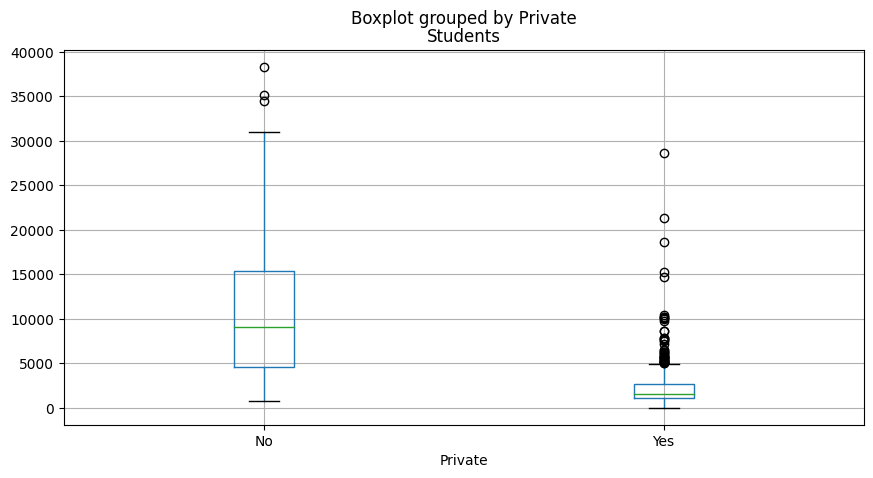

In [105]:
College.boxplot(column="Students", by="Private", figsize=(10,5))

From the graph above, the Yes box looks short, however the No  box is comparitevely tall which refers that large number of students frequents a no private institution.

# Question 4 

Display unique values of a categorical variable and their frequencies.

The function groupby() used to group row and column, and count() used to count for each group.

In [108]:
categorical_variables = College.groupby("PhD").Institution.count()
value = pd.DataFrame(categorical_variables)
value

,Institution
PhD,
<50,75
>50,670


The best way to view the variables by category using a bar plot 

<AxesSubplot: title={'center': 'Number of Institution by PhD range'}, xlabel='PhD'>

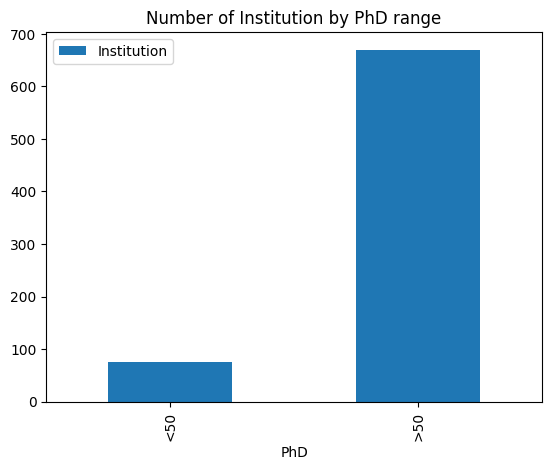

In [110]:
value.plot(kind="bar", title= "Number of Institution by PhD range")

# Question 5

Build a contingency table of two potentially related categorical variables.

The contingency table below summarizes relationship between two categorical variables PhD and Private.

In [112]:
contingency_table = pd.crosstab(College["PhD"], College["Private"])
contingency_table

Private,No,Yes
PhD,,
<50,12,63
>50,196,474


The better way to view the contingency tables variables is by using the bar plot 

<AxesSubplot: title={'center': 'Number of private institution by PhD range'}, xlabel='PhD'>

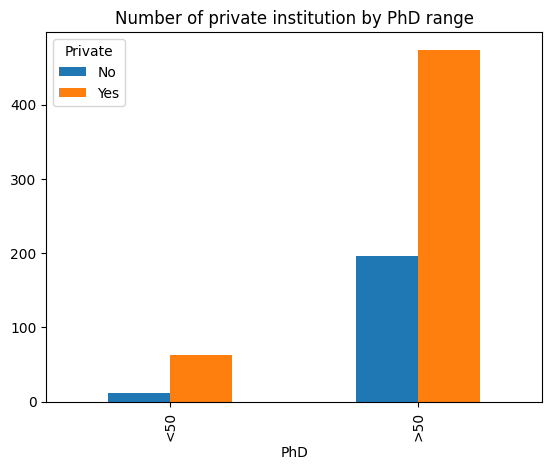

In [113]:
contingency_table.plot(kind="bar", title= "Number of private institution by PhD range")

Conduct a statistical test of the independence between them and interpret the results.

The chi-square test is used to determine whether there is an association between categorical variables, or not.

H0: There is no association between PhD and Private
Ha : There is an association between PhD and Private

In [115]:
chi2, p_value,dof,expected = stats.chi2_contingency(contingency_table)
print(f"the p_value is : {p_value}")

the p_value is : 0.02198044239708907


p_value < 0.05.

The p_value is less than the 0.05 (significance level of 5%), hence rejection of null hypothesis H0 that There is no association between PhD and Private 

The test proves that there PhD and Private are dependent, therefore for private institution the number of PhD is high compared with the public.

# Question 6

Retrieve one or more subset of rows based on two or more criteria and present descriptive statistics on the subset(s).

In [117]:
rows_subset_f = College[(College["Apps"]<1000) & (College["Private"] =="Yes") & (College["S.F.Ratio"] >16)]
rows_subset_f.set_index("Institution").head()

,Private,Apps,Accept,Enroll,Students,S.F.Ratio,Expend,Grad.Rate,PhD
Institution,,,,,,,,,
Averett College,Yes,627.0,556.0,172.0,1315.0,22.4,6523.0,48.0,>50
Bluefield College,Yes,377.0,358.0,181.0,782.0,17.8,6259.0,53.0,>50
Cabrini College,Yes,599.0,494.0,224.0,1481.0,16.5,7117.0,71.0,>50
Eastern Nazarene College,Yes,516.0,409.0,200.0,1268.0,17.3,6430.0,70.0,>50
Fontbonne College,Yes,291.0,245.0,126.0,1318.0,21.5,4607.0,62.0,<50


In [118]:
rows_subset_f.describe()

,Apps,Accept,Enroll,Students,S.F.Ratio,Expend,Grad.Rate
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,637.941176,502.911765,257.000000,2031.588235,20.102941,6030.411765,59.323529
std,180.876308,153.504786,85.320785,1599.852306,4.870722,1433.984449,14.797053
min,244.000000,198.000000,82.000000,782.000000,16.100000,3186.000000,34.000000
25%,510.750000,409.250000,201.000000,1235.000000,16.700000,4970.000000,49.000000
50%,630.000000,476.000000,239.500000,1628.000000,18.600000,6214.500000,57.500000
75%,809.750000,596.250000,326.000000,2398.500000,21.800000,6867.500000,69.250000
max,895.000000,802.000000,428.000000,10021.000000,39.800000,8767.000000,100.000000


In [119]:
rows_subset_s = College[(College["Grad.Rate"]>60) & (College["Private"] =="No")]
rows_subset_s.head()

,Institution,Private,Apps,Accept,Enroll,Students,S.F.Ratio,Expend,Grad.Rate,PhD
21,Appalachian State University,No,7313.0,4664.0,1910.0,10975.0,18.3,5854.0,70.0,>50
27,Auburn University-Main Campus,No,7548.0,6791.0,3070.0,17978.0,16.7,6642.0,69.0,>50
56,Bloomsburg Univ. of Pennsylvania,No,6773.0,3028.0,1025.0,6793.0,18.0,7041.0,75.0,>50
79,California State University at Fresno,No,4540.0,3294.0,1483.0,14748.0,21.2,7268.0,61.0,>50
118,Clemson University,No,8065.0,5257.0,2301.0,12525.0,18.0,7597.0,73.0,>50


In [120]:
rows_subset_s.describe()

,Apps,Accept,Enroll,Students,S.F.Ratio,Expend,Grad.Rate
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000
mean,8954.178082,5928.931507,2251.273973,13083.150685,16.689041,8436.561644,71.438356
std,7176.359760,4602.291342,1593.626292,8958.266209,3.305406,2957.047232,9.224042
min,441.000000,369.000000,172.000000,950.000000,7.800000,4172.000000,61.000000
25%,4144.000000,2589.000000,1025.000000,5889.000000,15.100000,6227.000000,65.000000
50%,7663.000000,4664.000000,1757.000000,11350.000000,17.000000,7855.000000,68.000000
75%,13528.000000,7871.000000,3290.000000,19115.000000,18.400000,9534.000000,76.000000
max,48094.000000,26330.000000,6392.000000,35206.000000,23.100000,16527.000000,100.000000


In [121]:
rows_subset_t = College[(College["Private"] == "No") & (College["Grad.Rate"] >60)]
rows_subset_t.head()

,Institution,Private,Apps,Accept,Enroll,Students,S.F.Ratio,Expend,Grad.Rate,PhD
21,Appalachian State University,No,7313.0,4664.0,1910.0,10975.0,18.3,5854.0,70.0,>50
27,Auburn University-Main Campus,No,7548.0,6791.0,3070.0,17978.0,16.7,6642.0,69.0,>50
56,Bloomsburg Univ. of Pennsylvania,No,6773.0,3028.0,1025.0,6793.0,18.0,7041.0,75.0,>50
79,California State University at Fresno,No,4540.0,3294.0,1483.0,14748.0,21.2,7268.0,61.0,>50
118,Clemson University,No,8065.0,5257.0,2301.0,12525.0,18.0,7597.0,73.0,>50


In [122]:
rows_subset_t.describe()

,Apps,Accept,Enroll,Students,S.F.Ratio,Expend,Grad.Rate
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000
mean,8954.178082,5928.931507,2251.273973,13083.150685,16.689041,8436.561644,71.438356
std,7176.359760,4602.291342,1593.626292,8958.266209,3.305406,2957.047232,9.224042
min,441.000000,369.000000,172.000000,950.000000,7.800000,4172.000000,61.000000
25%,4144.000000,2589.000000,1025.000000,5889.000000,15.100000,6227.000000,65.000000
50%,7663.000000,4664.000000,1757.000000,11350.000000,17.000000,7855.000000,68.000000
75%,13528.000000,7871.000000,3290.000000,19115.000000,18.400000,9534.000000,76.000000
max,48094.000000,26330.000000,6392.000000,35206.000000,23.100000,16527.000000,100.000000


In [127]:
rows_subset_m = College[(College["Private"] == "No") & (College["Grad.Rate"] <60)]
rows_subset_m.head()

,Institution,Private,Apps,Accept,Enroll,Students,S.F.Ratio,Expend,Grad.Rate,PhD
19,Angelo State University,No,3540.0,2001.0,1016.0,5702.0,23.1,4010.0,34.0,>50
23,Arizona State University Main campus,No,12809.0,10308.0,3761.0,30178.0,18.9,4602.0,48.0,>50
25,Arkansas Tech University,No,1734.0,1729.0,951.0,4541.0,19.6,4739.0,48.0,>50
45,Bemidji State University,No,1208.0,877.0,546.0,4620.0,19.6,3752.0,46.0,>50
78,California Polytechnic-San Luis,No,7811.0,3817.0,1650.0,14315.0,19.8,8453.0,59.0,>50


In [128]:
rows_subset_m.describe()

,Apps,Accept,Enroll,Students,S.F.Ratio,Expend,Grad.Rate
count,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000
mean,4058.604478,2866.656716,1325.328358,9335.276119,17.379851,6991.186567,47.305970
std,2971.087366,2031.701421,894.912352,6705.151648,3.502497,2427.687003,8.891347
min,233.000000,233.000000,153.000000,716.000000,6.700000,3605.000000,10.000000
25%,1767.000000,1261.000000,565.500000,4283.500000,15.100000,5507.500000,42.250000
50%,3338.500000,2479.500000,1067.000000,8189.500000,17.400000,6439.500000,49.000000
75%,5622.250000,3846.250000,1812.000000,13634.000000,19.600000,7726.000000,54.000000
max,15039.000000,10308.000000,3761.000000,38338.000000,28.800000,16352.000000,59.000000


# Question 7

Conduct a statistical test of the significance of the difference between the means of two subsets of the data and interpret the results.
To do so, it is needed to impelment the independent test.

H0: there is no difference between the means of the rows_subset_t and rows_subset_m
HA: there is a significant difference between the rows_subset_t and rows_subset_m


In [129]:
t_value, p_value =  stats.ttest_ind(rows_subset_t["Grad.Rate"], rows_subset_m["Grad.Rate"], equal_var=False)
print(f"t_value is equal: {t_value}, p_value is equal: {p_value}")

t_value is equal: 18.213819450046127, p_value is equal: 3.9016202881477374e-39


p_value < 0.05.

The p_value is less than the 0.05 (significance level of 5%), hence rejection of null hypothesis H0 that there is no difference between the means of the rows_subset_t and rows_subset_m. 

The test proves that there is a significant difference between the rows_subset_t and rows_subset_m, which means that there is a difference between the mean of non-private with graduation rate higher than 60 and less than 60

# Question 8

Create one or more tables that group the data by a certain categorical variable and display summarized information for 
each group (e.g. the mean or sum within the group).

The function groupby() used to group row and column, and Describe() used to display the descriptive statistics.

In [131]:
group_data = College.groupby("Private").describe().T
group_statistics=pd.DataFrame(group_data)
group_statistics

Private                    No           Yes
Apps      count    208.000000    537.000000
          mean    5762.846154   1938.175047
          std     5399.887725   2305.125727
          min      233.000000    100.000000
          25%     2190.750000    626.000000
          50%     4347.500000   1130.000000
          75%     7722.500000   2174.000000
          max    48094.000000  14446.000000
Accept    count    208.000000    537.000000
          mean    3932.721154   1289.294227
          std     3492.893134   1288.120961
          min      233.000000     90.000000
          25%     1563.250000    501.000000
          50%     2993.500000    850.000000
          75%     5264.000000   1579.000000
          max    26330.000000  10516.000000
Enroll    count    208.000000    537.000000
          mean    1646.225962    451.640596
          std     1265.020644    438.843969
          min      153.000000     35.000000
          25%      701.750000    209.000000
          50%     1390.000000    328.000000
          75%     2243.750000    514.000000
          max     6392.000000   4615.000000
Students  count    208.000000    537.000000
          mean   10617.125000   2283.139665
          std     7767.703702   2425.981912
          min      716.000000     16.000000
          25%     4544.000000   1076.000000
          50%     9125.000000   1608.000000
          75%    15422.500000   2650.000000
          max    38338.000000  28631.000000
S.F.Ratio count    208.000000    537.000000
          mean      17.132212     12.937989
          std        3.434321      3.527331
          min        6.700000      2.500000
          25%       15.100000     11.100000
          50%       17.250000     12.700000
          75%       19.325000     14.500000
          max       28.800000     39.800000
Expend    count    208.000000    537.000000
          mean    7485.274038  10483.260708
          std     2712.185478   5748.278974
          min     3605.000000   3186.000000
          25%     5715.000000   7444.000000
          50%     6718.000000   8954.000000
          75%     8606.000000  11625.000000
          max    16527.000000  56233.000000
Grad.Rate count    208.000000    537.000000
          mean      55.836538     68.856611
          std       14.608984     16.801739
          min       10.000000     15.000000
          25%       46.000000     58.000000
          50%       54.500000     69.000000
          75%       65.000000     81.000000
          max      100.000000    118.000000

# Question 9

Implement a linear regression model and interpret its output.

In [133]:
College.rename(columns={"Grad.Rate":"GraduationRate", "S.F.Ratio":"SFRatio"}, inplace=True)
linear_regression_model = sm.OLS.from_formula('Apps ~ Private + Accept+Enroll+PhD+Students+SFRatio+Expend +GraduationRate', data=College).fit()
linear_regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Apps   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     1004.
Date:                Wed, 14 Dec 2022   Prob (F-statistic):               0.00
Time:                        14:34:17   Log-Likelihood:                -6286.0
No. Observations:                 745   AIC:                         1.259e+04
Df Residuals:                     736   BIC:                         1.263e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1437.8159    341.860     -4.206      0.000   -2108.953    -766.678
Private[T.Yes]  -581.1879    133.375     -4.358      0.000    -843.028    -319.348
PhD[T.>50]      -115.9359    142.040     -0.816      0.415    -394.787     162.916
Accept             1.5052      0.042     36.119      0.000       1.423       1.587
Enroll            -0.5615      0.162     -3.475      0.001      -0.879      -0.244
Students           0.0433      0.021      2.077      0.038       0.002       0.084
SFRatio           19.1783     14.105      1.360      0.174      -8.512      46.869
Expend             0.1137      0.010     10.940      0.000       0.093       0.134
GraduationRate    12.1003      2.849      4.247      0.000       6.507      17.694
==============================================================================
Omnibus:                      555.260   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14315.583
Skew:                           3.060   Prob(JB):                         0.00
Kurtosis:                      23.584   Cond. No.                     1.04e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

For this model, the dependent variable is Apps , Number of applications the university received. whereas the indepednt variable are : Private, Accept, Enroll, PhD, Students, SFRatio, Expend, GraduationRate.
Coefficients:The "coef" column shows the actual model coefficients, Thus, our model is described by the line: 

Apps = -1437.8159 - (-581.1879)Private + (1.5052)Accept -(-0.5615)Enroll -(-115.9359)PhD + (0.0433)Students + (19.1783)SFRatio + (0.1137)Expend + (12.1003)GraduationRate + e
 (e stands for residuals and error to blame for misfiting data)
Significance of the variables: Using the 0.05 significance level, we can see that the intercept is significant (p<0.05), and so can not b ignored when making predictions. 
The coefficient of Private, Accept, Students, Expend, GradudationRate and Enroll are significant (p<0.05), that is very much below  𝛼=0.05 ), and thus those factors have a significant effect on the dependent variable.However, for SFRatio and PhD (p>0.05),hence these variables has no significant effect on the dependent variable Apps.

Quality of the Model: both  𝑅2  and the adjusted  𝑅2  values are around 0.9, which indicates that the model is highly  good, i.e., about 91% of the Application depends on Private, Accept, Students, Expend, GradudationRate and Enroll. Threfore, there is 10% remainning of other factors that affect the number of application, our model did not take into account, which is  minor.

Correlation to measure the association between Apps and SFRatio,a s we found that SFRatio has no significant effect on Apps, which is indeed proven by this example below.
Pearson coefficient = 0.1, which indicates a weak correlation

In [140]:
College['Apps'].corr(College['SFRatio'], method = 'pearson')

0.10623140239561338

Resubmitting the model after removing the insignificant variables

In [141]:
linear_regression_model = sm.OLS.from_formula('Apps ~ Private + Accept+Enroll+Students+Expend +GraduationRate', data=College).fit()
linear_regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Apps   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     1337.
Date:                Wed, 14 Dec 2022   Prob (F-statistic):               0.00
Time:                        14:57:13   Log-Likelihood:                -6287.2
No. Observations:                 745   AIC:                         1.259e+04
Df Residuals:                     738   BIC:                         1.262e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1144.0007    186.117     -6.147      0.000   -1509.382    -778.620
Private[T.Yes]  -618.5068    129.047     -4.793      0.000    -871.849    -365.165
Accept             1.5068      0.042     36.160      0.000       1.425       1.589
Enroll            -0.5630      0.162     -3.484      0.001      -0.880      -0.246
Students           0.0437      0.021      2.101      0.036       0.003       0.085
Expend             0.1057      0.009     11.997      0.000       0.088       0.123
GraduationRate    11.6795      2.815      4.148      0.000       6.152      17.207
==============================================================================
Omnibus:                      557.729   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14402.658
Skew:                           3.080   Prob(JB):                         0.00
Kurtosis:                      23.640   Cond. No.                     5.75e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.75e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [5]:
%%javascript
var nb = IPython.notebook;
var kernel = IPython.notebook.kernel;
var command = "NOTEBOOK_FULL_PATH = '" + nb.notebook_path + "'";
kernel.execute(command);

<IPython.core.display.Javascript object>

In [6]:
import io
from nbformat import read, NO_CONVERT

with io.open(NOTEBOOK_FULL_PATH.split("/")[-1], 'r', encoding='utf-8') as f:
    nb = read(f, NO_CONVERT)

word_count = 0
for cell in nb.cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print(f"Word count: {word_count}")

Word count: 1060


# Conclusion

To conclude, this project has focused on studying diffrent aspects and implement diffrent concepts, such as testing hypothesis, graph ploting and regression analysis.
It was shown that there a relationship between private institution and the PhD where the number for PhD is high compared to the public.
Moreover, a regression analysis was conducted to study the causality between dependent and independent variables.
After removing the insignificance variables the adjusted R square value is equal to 91.5%, which means that 91.5% the number of applications is significantly affected by Private, Accept, Students, Expend, GradudationRate and Enroll and 9% affected by otehr factors.